## Retention Metrics

In [29]:
import pandas as pd
import datetime as dt

from operator import attrgetter

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('../data/online_retail_cleaned.csv')

In [6]:
# Keep only rows with positive Quantity and UnitPrice
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## Classic retention rate:
   - % of customers from Month 0 who had activity in Month 1, 2, 3, etc.
   - Formula: `(Active in Month N) / (Total in Cohort) * 100`

In [ ]:
# Convert 'InvoiceDate' to datetime format and extract month of purchase
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')

# Calculate the cohort month (the month of the customer's first purchase)
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [19]:
# Aggregate data to get the number of unique customers per cohort per month
cohort_data = data.groupby(['CohortMonth', 'InvoiceMonth']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop=False)

cohort_data['period_number'] = (cohort_data['InvoiceMonth'] - cohort_data['CohortMonth']).apply(attrgetter('n'))

In [20]:
cohort_data.head()

,CohortMonth,InvoiceMonth,n_customers,period_number
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,321,4


## Cohort retention table:

In [22]:
# Cohort matrix
# Aggregate cohort data per cohort month and invice month and count unique customers
cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='period_number', values='n_customers')

In [23]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculate retention matrix
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [26]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Retention curves:
* Plot retention % over time for each cohort
* Overlay multiple cohorts to compare

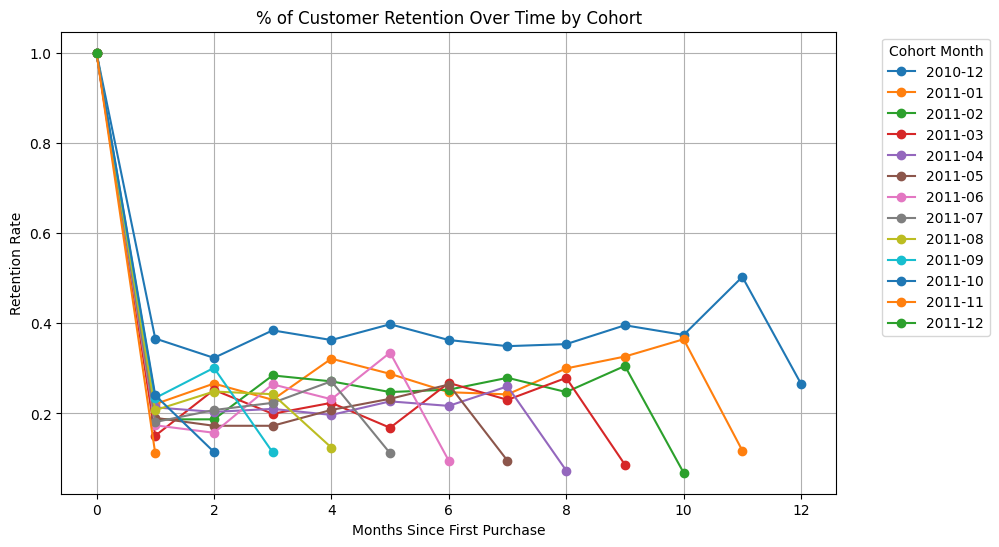

In [46]:
# Line plot visualization
plt.figure(figsize=(10, 6))
for i in range(retention_matrix.shape[0]):
    plt.plot(retention_matrix.columns, retention_matrix.iloc[i, :], marker='o', label=str(retention_matrix.index[i])) 
plt.title('% of Customer Retention Over Time by Cohort')
plt.xlabel('Months Since First Purchase')   
plt.ylabel('Retention Rate')
plt.legend(title='Cohort Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()  

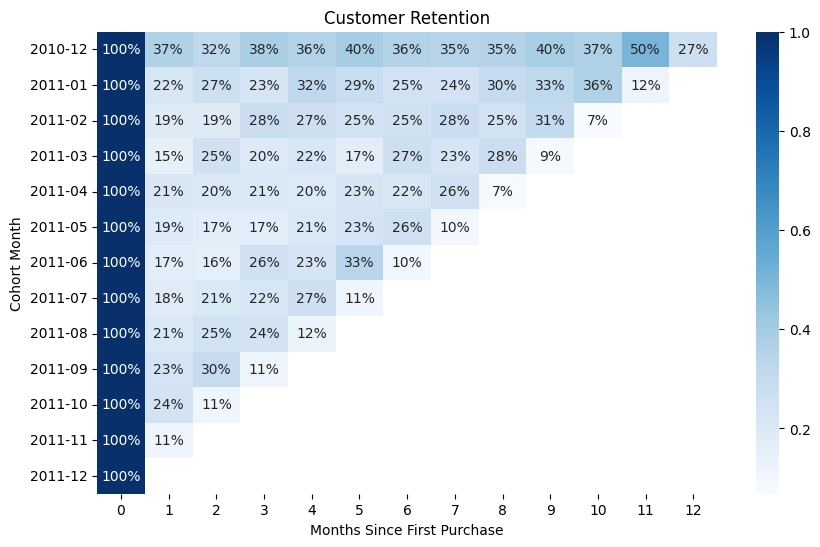

In [44]:
# Heatmap visualization
plt.figure(figsize=(10, 6)) 
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues')
plt.title('Customer Retention')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

The figures show a pronounced drop in retention in the second month (period 1), with roughly 80% of customers no longer making purchases by that time. The initial cohort from December 2010 stands out as an exception, exhibiting notably stronger performance compared to subsequent cohorts. Approximately one year after their first purchase, around 50% of this cohort remains active. This suggests that these customers may be particularly loyal or engaged, possibly having joined the platform through pre-existing relationships with the retailer. However, drawing firm conclusions about the underlying reasons is difficult based solely on the available data.

Across the cohort matrix, retention rates fluctuate over time. This pattern likely reflects the nature of the business, where customers make purchases intermittently, with active periods followed by stretches of inactivity.